### **Importing Necessory libraries**

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## **Loading The Dataset**

In [2]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
df = sns.load_dataset("tips")
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


## **Reading The Data**

### **Finding the Shape**

In [4]:
df.shape

(244, 7)

### **Finding the Top & Bottom Rows**

In [5]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


### **Finding the Name of The Columns**

In [7]:
df.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

### **Finding the Information About The Dataset**

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


### **Statistical Information About The Dataset**

In [9]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
total_bill,244.0,NaN,NaN,NaN,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,NaN,NaN,NaN,2.998279,1.383638,1.0,2.0,2.9,3.5625,10.0
sex,244,2,Male,157,NaN,NaN,NaN,NaN,NaN,NaN,NaN
smoker,244,2,No,151,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day,244,4,Sat,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN
time,244,2,Dinner,176,NaN,NaN,NaN,NaN,NaN,NaN,NaN
size,244.0,NaN,NaN,NaN,2.569672,0.9511,1.0,2.0,2.0,3.0,6.0


### **Finding the Null Values in the dataset**

In [10]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [11]:
df.notnull().sum()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
size          244
dtype: int64

In [12]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### **Handling missing values**

- df.dropna(inplace=True) # df.dropna(subset=['C N], inplace=True)
- df.fillna(value, inplace = True) # method=ffill, bfill
- df.interplote(inplace=True)

### **Finding Duplicates in the dataset**

In [13]:
df.duplicated().sum()

np.int64(1)

### **Removing the Duplicates from the dataset**

In [14]:
df.drop_duplicates(inplace=True)

In [15]:
df.duplicated().sum()

np.int64(0)

### **Grouping the Variable**

In [16]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [17]:
df.groupby('day')['tip'].sum() #sum of tips on each day

day
Thur    169.83
Fri      51.96
Sat     260.40
Sun     247.39
Name: tip, dtype: float64

In [18]:
df.groupby(['day','sex'])['tip'].sum()

day   sex   
Thur  Male       89.41
      Female     80.42
Fri   Male       26.93
      Female     25.03
Sat   Male      181.95
      Female     78.45
Sun   Male      186.78
      Female     60.61
Name: tip, dtype: float64

In [19]:
df.groupby(['day','sex']).agg({'tip':'sum', 'total_bill':'mean'}).reset_index()

,day,sex,tip,total_bill
0,Thur,Male,89.41,18.714667
1,Thur,Female,80.42,16.835161
2,Fri,Male,26.93,19.857000
3,Fri,Female,25.03,14.145556
4,Sat,Male,181.95,20.802542
5,Sat,Female,78.45,19.680357
6,Sun,Male,186.78,21.887241
7,Sun,Female,60.61,19.872222


### **Finding the unique values in column**

In [20]:
df['time'].unique() #to see the unique values in the column


['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [21]:
df['time'].nunique() # to see the number of unique values in the column

2

In [22]:
df['tip'].nlargest(1) # to get the largest value in the column

170    10.0
Name: tip, dtype: float64

In [23]:
df['tip'].nsmallest(1) # to get the smallest value in the column

67    1.0
Name: tip, dtype: float64

In [24]:
df[df['day'].str.contains('Sun')] # to get the rows where the day column contains 'Sun'

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
186,20.90,3.50,Female,Yes,Sun,Dinner,3
187,30.46,2.00,Male,Yes,Sun,Dinner,5
188,18.15,3.50,Female,Yes,Sun,Dinner,3
189,23.10,4.00,Male,Yes,Sun,Dinner,3


### **Finding Count of Each unique values**

In [25]:
df['time'].value_counts() # to get the count of each unique value in the column

time
Dinner    176
Lunch      67
Name: count, dtype: int64

In [26]:
df.sort_values(by='total_bill',ascending=False).head(10) # to get the top 10 rows with the highest total_bill

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
102,44.30,2.50,Female,Yes,Sat,Dinner,3
197,43.11,5.00,Female,Yes,Thur,Lunch,4
142,41.19,5.00,Male,No,Thur,Lunch,5
184,40.55,3.00,Male,Yes,Sun,Dinner,2
95,40.17,4.73,Male,Yes,Fri,Dinner,4


In [27]:
# Gender Analysis
gender_analysis = df.groupby('sex')[['total_bill', 'tip']].mean() # to get the average total_bill and tip for each
print('\nGender Analysis:\n', gender_analysis)


Gender Analysis:
         total_bill       tip
sex                         
Male     20.744076  3.089618
Female   18.115698  2.843140


In [28]:
df.groupby('sex').agg({'tip':'mean','total_bill':'mean'}) # to get the average tip and total_bill 

,tip,total_bill
sex,,
Male,3.089618,20.744076
Female,2.843140,18.115698


In [29]:
# Day-wise Analysis
day_analysis = df.groupby('day')[['total_bill', 'tip']].mean() # to get the average total_bill and tip for each day
print('\nDay-wise Analysis:\n', day_analysis)


Day-wise Analysis:
       total_bill       tip
day                       
Thur   17.759508  2.784098
Fri    17.151579  2.734737
Sat    20.441379  2.993103
Sun    21.410000  3.255132


In [30]:
# Size Impact
size_analysis = df.groupby('size')[['total_bill', 'tip']].mean() # to get the average total_bill and tip for each size
print('\nSize Impact:\n', size_analysis)


Size Impact:
       total_bill       tip
size                      
1       7.242500  1.437500
2      16.470258  2.586065
3      23.277632  3.393158
4      28.613514  4.135405
5      30.068000  4.028000
6      34.830000  5.225000


In [31]:
# Smoking vs. Non-Smoking
smoking_analysis = df.groupby('smoker')[['total_bill', 'tip']].mean() # to get the average total_bill and tip for each smoker
print('\nSmoking vs. Non-Smoking Analysis:\n', smoking_analysis)


Smoking vs. Non-Smoking Analysis:
         total_bill       tip
smoker                      
Yes      20.840652  3.019674
No       19.188278  2.991854


In [32]:
time_analysis = df.groupby('time')[['total_bill', 'tip']].mean() #` to get the average total_bill and tip for each time`
print('\nSmoking vs. Non-Smoking Analysis:\n', time_analysis)


Smoking vs. Non-Smoking Analysis:
         total_bill       tip
time                        
Lunch    17.230896  2.738955
Dinner   20.797159  3.102670


## **Data Visualization**

**palatte**

'Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap', 'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r'

### **1.Bar Plot / Count Plot**

A bar plot is a visualization used to represent categorical data with rectangular bars. The length or height of each bar is proportional to the value it represents. Bar plots are widely used for comparing quantities across categories, making them a fundamental tool in data analysis and visualization. 

- Displaying the distribution of categorical variables.
- Visualizing the frequency or count of each category in a dataset.

In [33]:
df.groupby('day')['tip'].mean()

day
Thur    2.784098
Fri     2.734737
Sat     2.993103
Sun     3.255132
Name: tip, dtype: float64

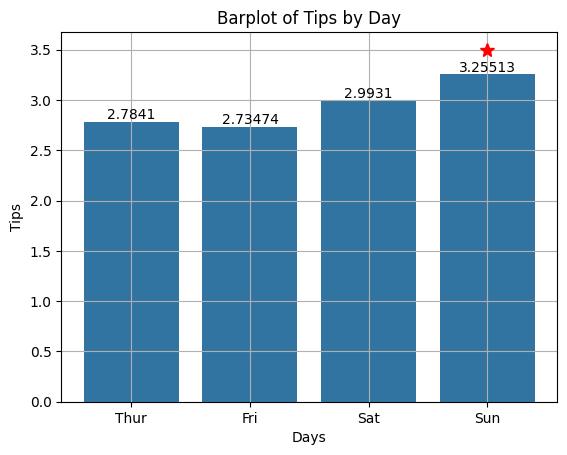

In [34]:
ax = sns.barplot(data=df, x='day', y ='tip', estimator='mean', errorbar=None)
ax.bar_label(ax.containers[0], fontsize=10)
ax.plot('Sun', 3.5, 'r*', markersize=10)
plt.grid()
plt.xlabel('Days')
plt.ylabel('Tips')
plt.title('Barplot of Tips by Day')
plt.show()

### **2. Countplot**

A count plot is a type of bar plot that displays the count of observations in each category of a categorical variable. It is commonly used in exploratory data analysis to visualize the distribution of a single categorical variable or to compare distributions across a second categorical variable.

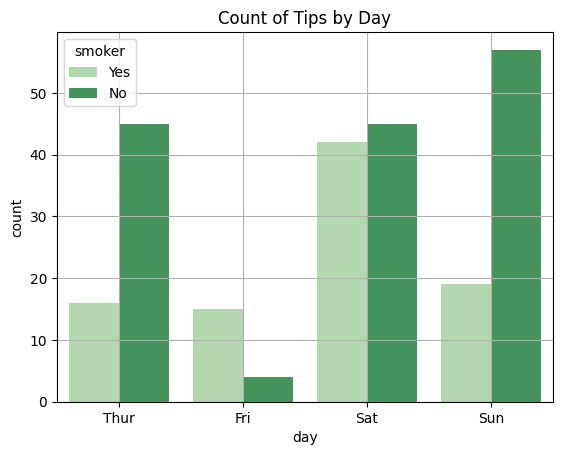

In [35]:
sns.countplot(data=df, x='day', hue='smoker', palette='Greens')
plt.grid(True)
plt.title('Count of Tips by Day')
plt.show()

### **3. Pie Chart**

A pie chart is a circular statistical graphic that divides a circle into slices to represent proportions of a whole. Each slice's size is proportional to the value it represents. Pie charts are commonly used to visualize data distribution across categories.

In [36]:
Smoker = df['smoker'].value_counts()
Smoker

smoker
No     151
Yes     92
Name: count, dtype: int64

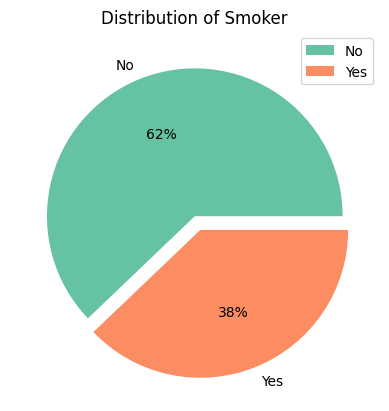

In [37]:
plt.pie(Smoker, labels=Smoker.index, autopct='%1.f%%', explode=[0, 0.1], colors=sns.color_palette('Set2'))
plt.legend()
plt.title('Distribution of Smoker')
plt.show()

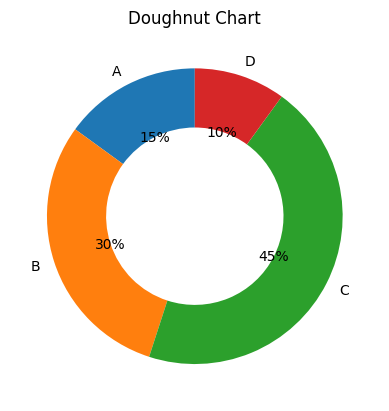

In [38]:
categories = ['A', 'B', 'C', 'D']
values = [15, 30, 45, 10]

plt.pie(values, labels=categories, autopct='%1.f%%', startangle=90, wedgeprops={'width': 0.4})
plt.title("Doughnut Chart")
plt.show()

In [39]:
sns.color_palette('winter')

[(0.0, 0.1411764705882353, 0.9294117647058824),
 (0.0, 0.28627450980392155, 0.8568627450980393),
 (0.0, 0.42745098039215684, 0.7862745098039216),
 (0.0, 0.5725490196078431, 0.7137254901960784),
 (0.0, 0.7137254901960784, 0.6431372549019607),
 (0.0, 0.8588235294117647, 0.5705882352941176)]

### **4. Scatter Plot**

A scatter plot is a type of data visualization used to display the relationship between two numerical variables. Each point in the scatter plot represents an observation, with its position determined by the values of two variables—one on the x-axis and the other on the y-axis.

- Exploring the relationship between two continuous variables.
- Identifying patterns, correlations, or clusters in the data.
- Bivariate Visualization:
    - Plots two numerical variables against each other.

In [40]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

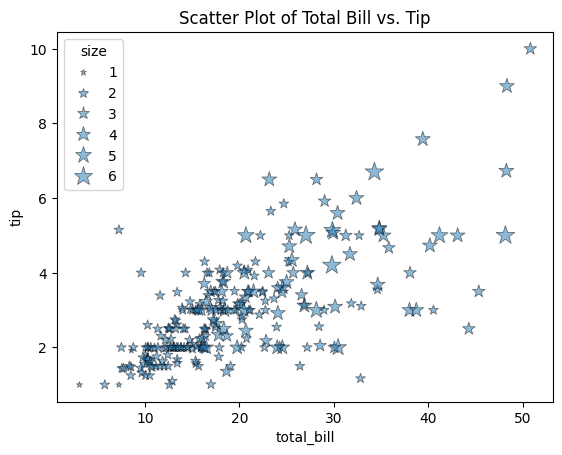

In [41]:
sns.scatterplot(data=df, x='total_bill', y='tip', alpha = 0.5, marker='*', edgecolor='black',legend=True, size="size", sizes=(20, 200)) #p,s,h,d,x,^,+,*,-
plt.title('Scatter Plot of Total Bill vs. Tip')
plt.show()

### **5. Line Plot**

A line plot is a type of data visualization used to display data points connected by a continuous line. It is typically used to represent trends or changes over time, making it one of the most popular visualizations for time series data.

- Displaying the trend or pattern in a time series.
- Showing the relationship between two continuous variables over a continuous interval.
- Comparing changes in variables over a continuous range.

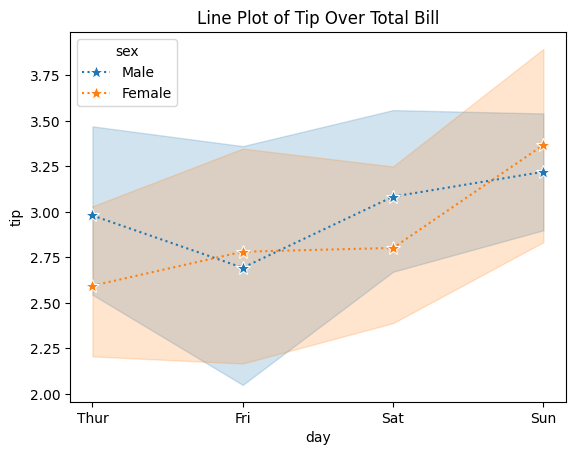

In [42]:
sns.lineplot(data=df, x='day', y='tip', hue='sex', orient="x", marker='*', markersize=10, linestyle=':')
plt.title('Line Plot of Tip Over Total Bill')
plt.show()

### **6. Box Plot**

A box plot (or whisker plot) is a standardized way of displaying the distribution of data based on a five-number summary: minimum, first quartile (Q1), median (Q2), third quartile (Q3), and maximum. It provides a visual summary of data, highlighting the central tendency, variability, and potential outliers.

Components of a Box Plot
- Box:
    - Represents the interquartile range (IQR), which is the range between the first quartile (Q1, 25th percentile) and third quartile (Q3, 75th percentile).
    - The box's lower boundary corresponds to Q1, and the upper boundary corresponds to Q3.
    - The line inside the box indicates the median (Q2, 50th percentile).

Whiskers:
    - Extend from the box to the smallest and largest values within the range of 1.5 × IQR from Q1 and Q3.
    - The whiskers represent the range of "typical" values that are not outliers.

Outliers:
    - Points beyond the whiskers are considered outliers.
    - These are data points that fall below  𝑄1 − 1.5 × IQR or above  𝑄3 + 1.5 × IQR

Notches (Optional):
    - Some box plots include notches around the median, which provide a rough indication of the confidence interval for the median.

- Five-Number Summary
    - Minimum: Smallest non-outlier value.
    - Q1 (First Quartile): 25th percentile of the data (lower quartile).
    - Median (Q2): 50th percentile (middle value when data is sorted).
    - Q3 (Third Quartile): 75th percentile of the data (upper quartile).
    - Maximum: Largest non-outlier value.

- Displaying the mean, median, quantiles, and outliers in data.
- Comparing the distribution of multiple variables.
- Identifying the spread of numerical variables.
- Detecting potential outliers in the dataset.

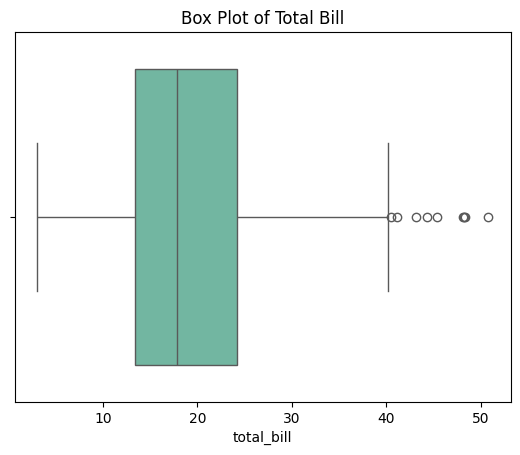

In [43]:
sns.boxplot(data=df, x='total_bill', fill=True, palette='Set2')
plt.title('Box Plot of Total Bill')
plt.show()

### **7. Density Plot**

A density plot is a graphical representation of the distribution of a dataset. It uses kernel density estimation (KDE) to smooth the data into a continuous probability density curve. Density plots are a great alternative to histograms as they provide a smoothed view of the distribution, making it easier to observe patterns without being affected by the choice of bin sizes.

we use density plots instead of histograms
- Visualizing the distribution of a continuous variable.
- Identifying peaks, valleys, and overall patterns in the data.
- Understanding the shape of the distribution.
- Comparing the distributions of multiple variables.

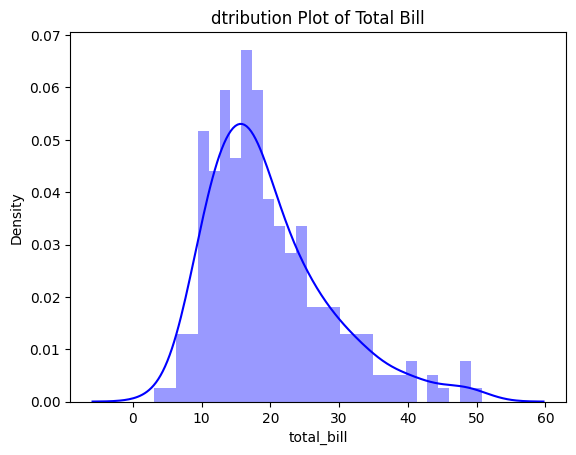

In [44]:
sns.distplot(df['total_bill'], hist=True, bins=30, color='b', kde=True, vertical=False)
plt.title('dtribution Plot of Total Bill')
plt.show()

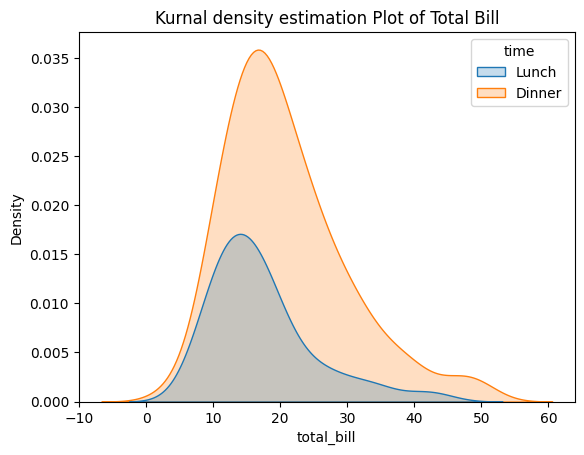

In [45]:
sns.kdeplot(data=df, x='total_bill', hue="time", shade=True)
plt.title('Kurnal density estimation Plot of Total Bill')
plt.show()

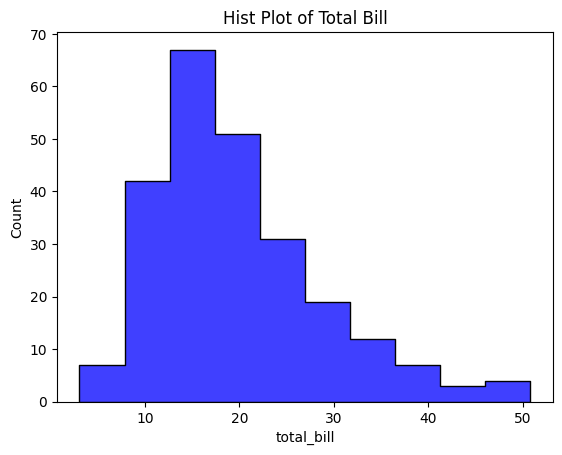

In [46]:
sns.histplot(data=df,x='total_bill',edgecolor= 'black', bins=10 ,element="step", color='blue') #poly , fill= False
plt.title('Hist Plot of Total Bill')
plt.show()

### **8. Pairplot**

A pair plot is a grid of scatter plots and histograms that allows you to visualize the relationships between multiple numerical variables in a dataset. It is one of the most effective tools for exploratory data analysis (EDA) when dealing with multivariate data. The pair plot is particularly useful for identifying trends, correlations, and outliers across variables.

- Exploring correlations and trends between multiple variables by visualizing them in pairs.

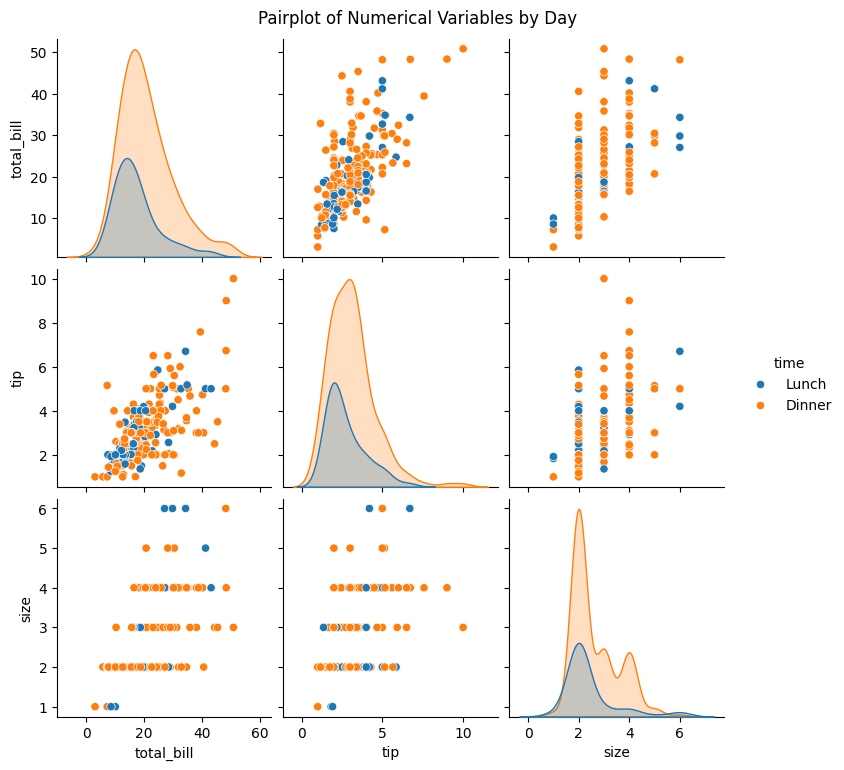

In [47]:
#sns.pairplot(df , kind = "scatter") # "scatter", "reg", "kde", "hex"
sns.pairplot(df, hue='time', diag_kind="kde") 
plt.suptitle('Pairplot of Numerical Variables by Day', y=1.02, x=0.5)
plt.show()

### **9. Heatmap**

A heatmap is a data visualization tool that uses color gradients to represent the values in a matrix or a table. It is particularly useful for visualizing correlations, patterns, and large datasets, making it easier to identify trends or outliers.

- Displaying the correlation matrix of numerical variables.
- Identifying patterns and relationships in a large dataset.
- Normalization:
    - Use vmin and vmax to set minimum and maximum values for color scaling.


In [48]:
Num = df.select_dtypes(include=['int','float']).columns.tolist()
Num

['total_bill', 'tip', 'size']

In [49]:
correlation_matrix = df[Num].corr()
correlation_matrix

,total_bill,tip,size
total_bill,1.000000,0.674998,0.597589
tip,0.674998,1.000000,0.488400
size,0.597589,0.488400,1.000000


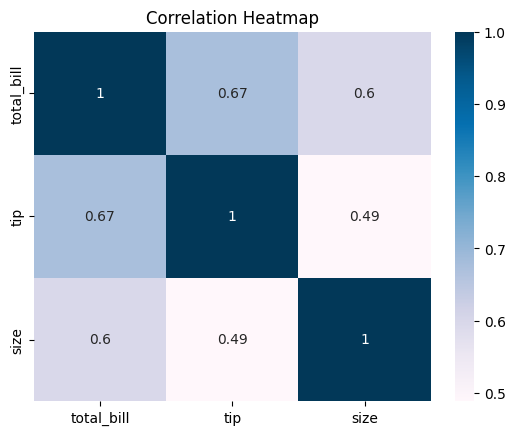

In [50]:
sns.heatmap(correlation_matrix, annot=True, cmap='PuBu')
plt.title('Correlation Heatmap')
plt.show()

### **10. Violin Plot**

A violin plot is a data visualization that combines features of a box plot and a kernel density plot. It provides insights into the distribution of a dataset by showing both summary statistics and the data's density shape.

- Combines the features of box plots and kernel density plots.
- Visualizing the distribution of a numerical variable across different categories.
- Handling Outliers:
    - More informative than box plots in highlighting nuances, such as outliers or clusters.

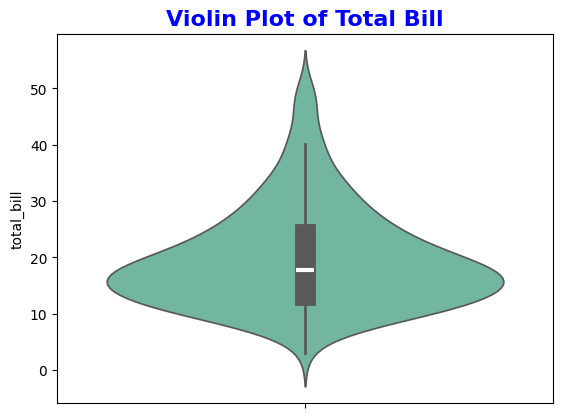

In [51]:
sns.violinplot(data=df, y='total_bill', split=False, inner_kws=dict(box_width=15, whis_width=2), palette='Set2') #inner='quartile', 'point', 'stick', 'box', 'None'
plt.title('Violin Plot of Total Bill', color='blue', fontsize=16, fontweight='bold')
plt.show()

### **11. Jointplot**

A jointplot is a powerful visualization tool in the Seaborn library that displays the relationship between two variables along with their individual distributions. It is a combination of a scatterplot (or other types of bivariate plots) and marginal histograms (or other univariate plots).

- Bivariate Relationship:
    - Shows the relationship between two variables (e.g., scatterplot, regression, or hexbin).
- Univariate Distributions:
    - Displays the marginal distributions of each variable along the axes.
- Exploring the relationship between two continuous variables.
- Identifying patterns, correlations, or clusters in the data.

- Detecting Patterns:
    - Spot clusters, trends, or outliers in data.

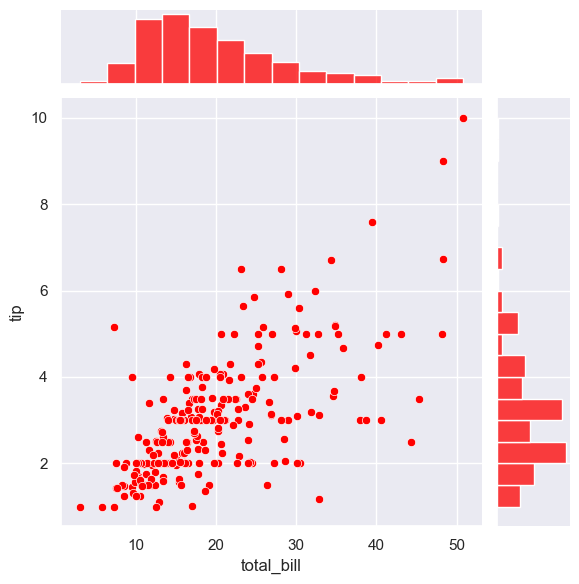

In [60]:
x= 'total_bill'
y = 'tip'
sns.jointplot(x=x, y=y, kind='scatter', data = df, color='red') #“scatter” | “kde” | “hist” | “hex” | “reg” | “resid”
plt.show()

### **12. Swarm Plot**

A swarm plot is a type of categorical scatter plot that arranges points along a categorical axis while avoiding overlap. It provides a clear view of individual data points, making it useful for visualizing distributions within categories.

- Draw a categorical scatterplot with points adjusted to be non-overlapping.
- This function is similar to stripplot(), but the points are adjusted (only along the categorical axis) so that they don’t overlap
- Identify outliers in each category easily.
- Swarm plots are an excellent choice for visualizing distributions and spotting individual outliers in categorical data.

In [62]:
df['size'].unique()

array([2, 3, 4, 1, 6, 5])

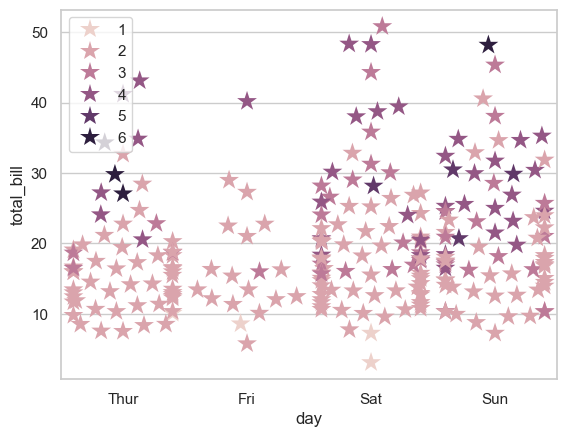

In [64]:
sns.set_style("whitegrid")

# Create a swarmplot
sns.swarmplot(x='day', y='total_bill',hue='size', data=df, size=15, legend=True, marker='*')  # size is used for marker size , marker='*
plt.legend(loc='upper left')
# Show the plot
plt.show()

### **13. Strip Plot**

A strip plot is a type of scatter plot in Seaborn used for visualizing the distribution of a numerical variable across categories. Unlike a swarm plot, it does not adjust the position of points to prevent overlap, but it can add jitter to avoid perfect alignment.

- Draw a categorical scatterplot using jitter to reduce overplotting
- A strip plot can be drawn on its own, but it is also a good complement to a box or violin plot in cases where you want to show all observations along with some representation of the underlying distribution.

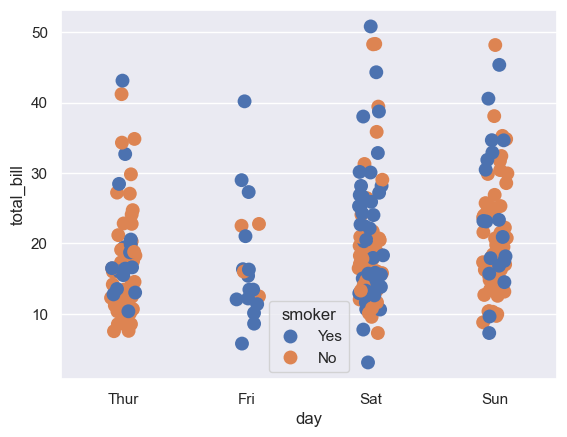

In [54]:
sns.set(font_scale=1)

# Create a striplot
sns.stripplot(data=df, x='day', y='total_bill', hue= 'smoker', size=10)  # size is used for marker size

# Show the plot
plt.show()

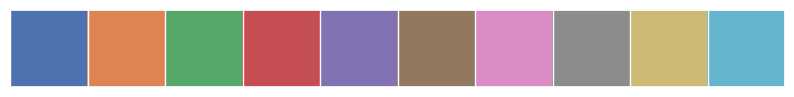

In [55]:
palette = sns.color_palette()
sns.palplot(palette)
 
plt.show()

### **Combining Plots**

Combining plots in Seaborn is a powerful way to gain deeper insights into your data. By leveraging different plot types together, you can highlight patterns, summarize distributions, and display individual points in a single, comprehensive visualization.

- Well, we sort of do that a lot when it comes to EDA by employing plots that are actually just a combination of the plots discussed above.
- We do this in an attempt to ‘save time’ but let’s be real, decent EDA takes a lot of time regardless.

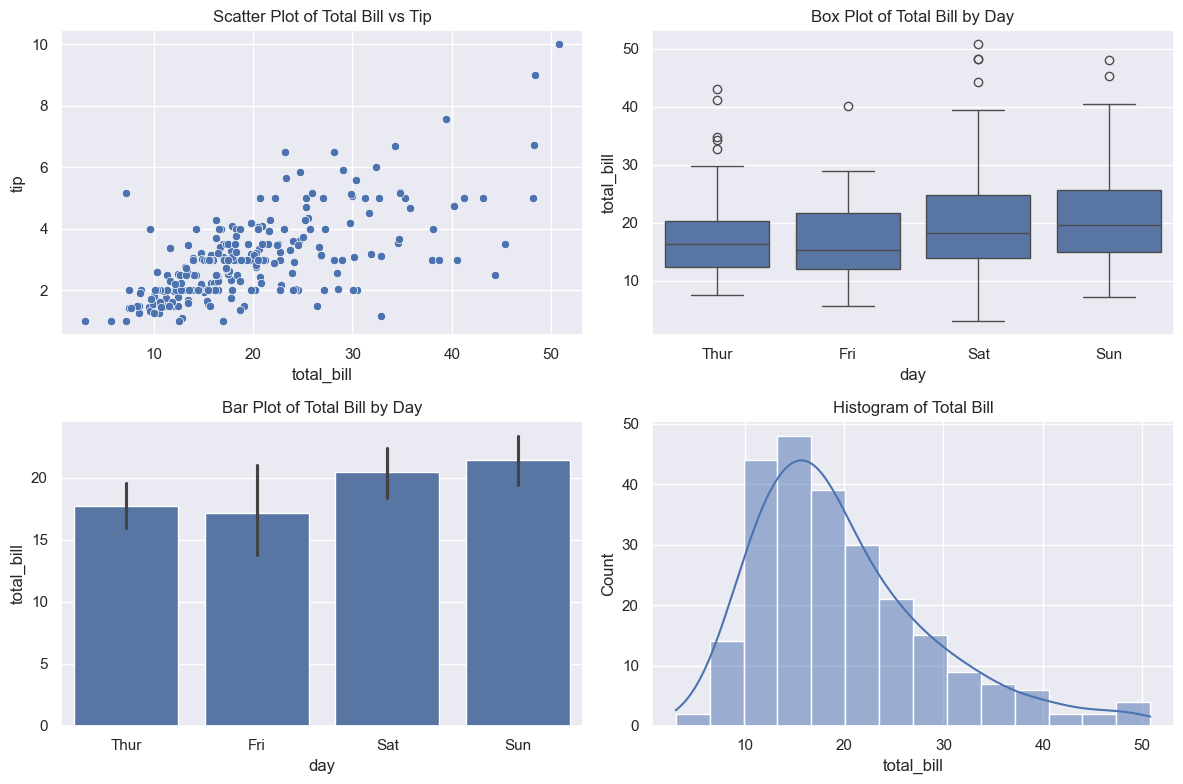

In [56]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.scatterplot(x='total_bill', y='tip', data=df)
plt.title('Scatter Plot of Total Bill vs Tip')

plt.subplot(2, 2, 2)
sns.boxplot(x='day', y='total_bill', data=df)
plt.title('Box Plot of Total Bill by Day')

plt.subplot(2, 2, 3)
sns.barplot(x='day', y='total_bill', data=df)
plt.title('Bar Plot of Total Bill by Day')

plt.subplot(2, 2, 4)
sns.histplot(df['total_bill'], kde=True)
plt.title('Histogram of Total Bill')

plt.tight_layout() # Improves the layout of the plots
plt.show()

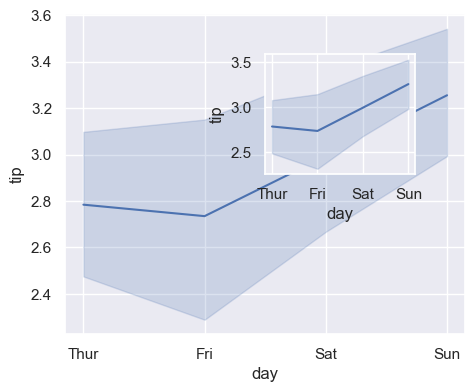

In [57]:
def graph():
    sns.lineplot(x = df["day"],y = df["tip"])
 
    # Creating a new figure with width = 5 inches
# and height = 4 inches
fig = plt.figure(figsize =(5, 4))
 
# Creating first axes for the figure
ax1 = fig.add_axes([0.1, 0.1, 0.8, 0.8])
 
# plotting the graph
graph()
 
# Creating second axes for the figure
ax2 = fig.add_axes([0.5, 0.5, 0.3, 0.3])
 
# plotting the graph
graph()
 